In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
v_1 = np.array([[3/5],[4/5]])
v_2 = np.array([[-4/5],[3/5]])
V = np.squeeze(np.array([v_1,v_2])).T
variance = 1
n = 100 


Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[3],[4]], diag(Lambda) = [1,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[3],[4]], diag(Lambda) = [8,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[3],[4]], diag(Lambda) = [1,8]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[-4],[3]], diag(Lambda) = [8,1]')

Text(0.5,0,'x1')

Text(0,0.5,'y1')

Text(0.5,1,'wstar=[[0],[4]], diag(Lambda) = [8,1]')

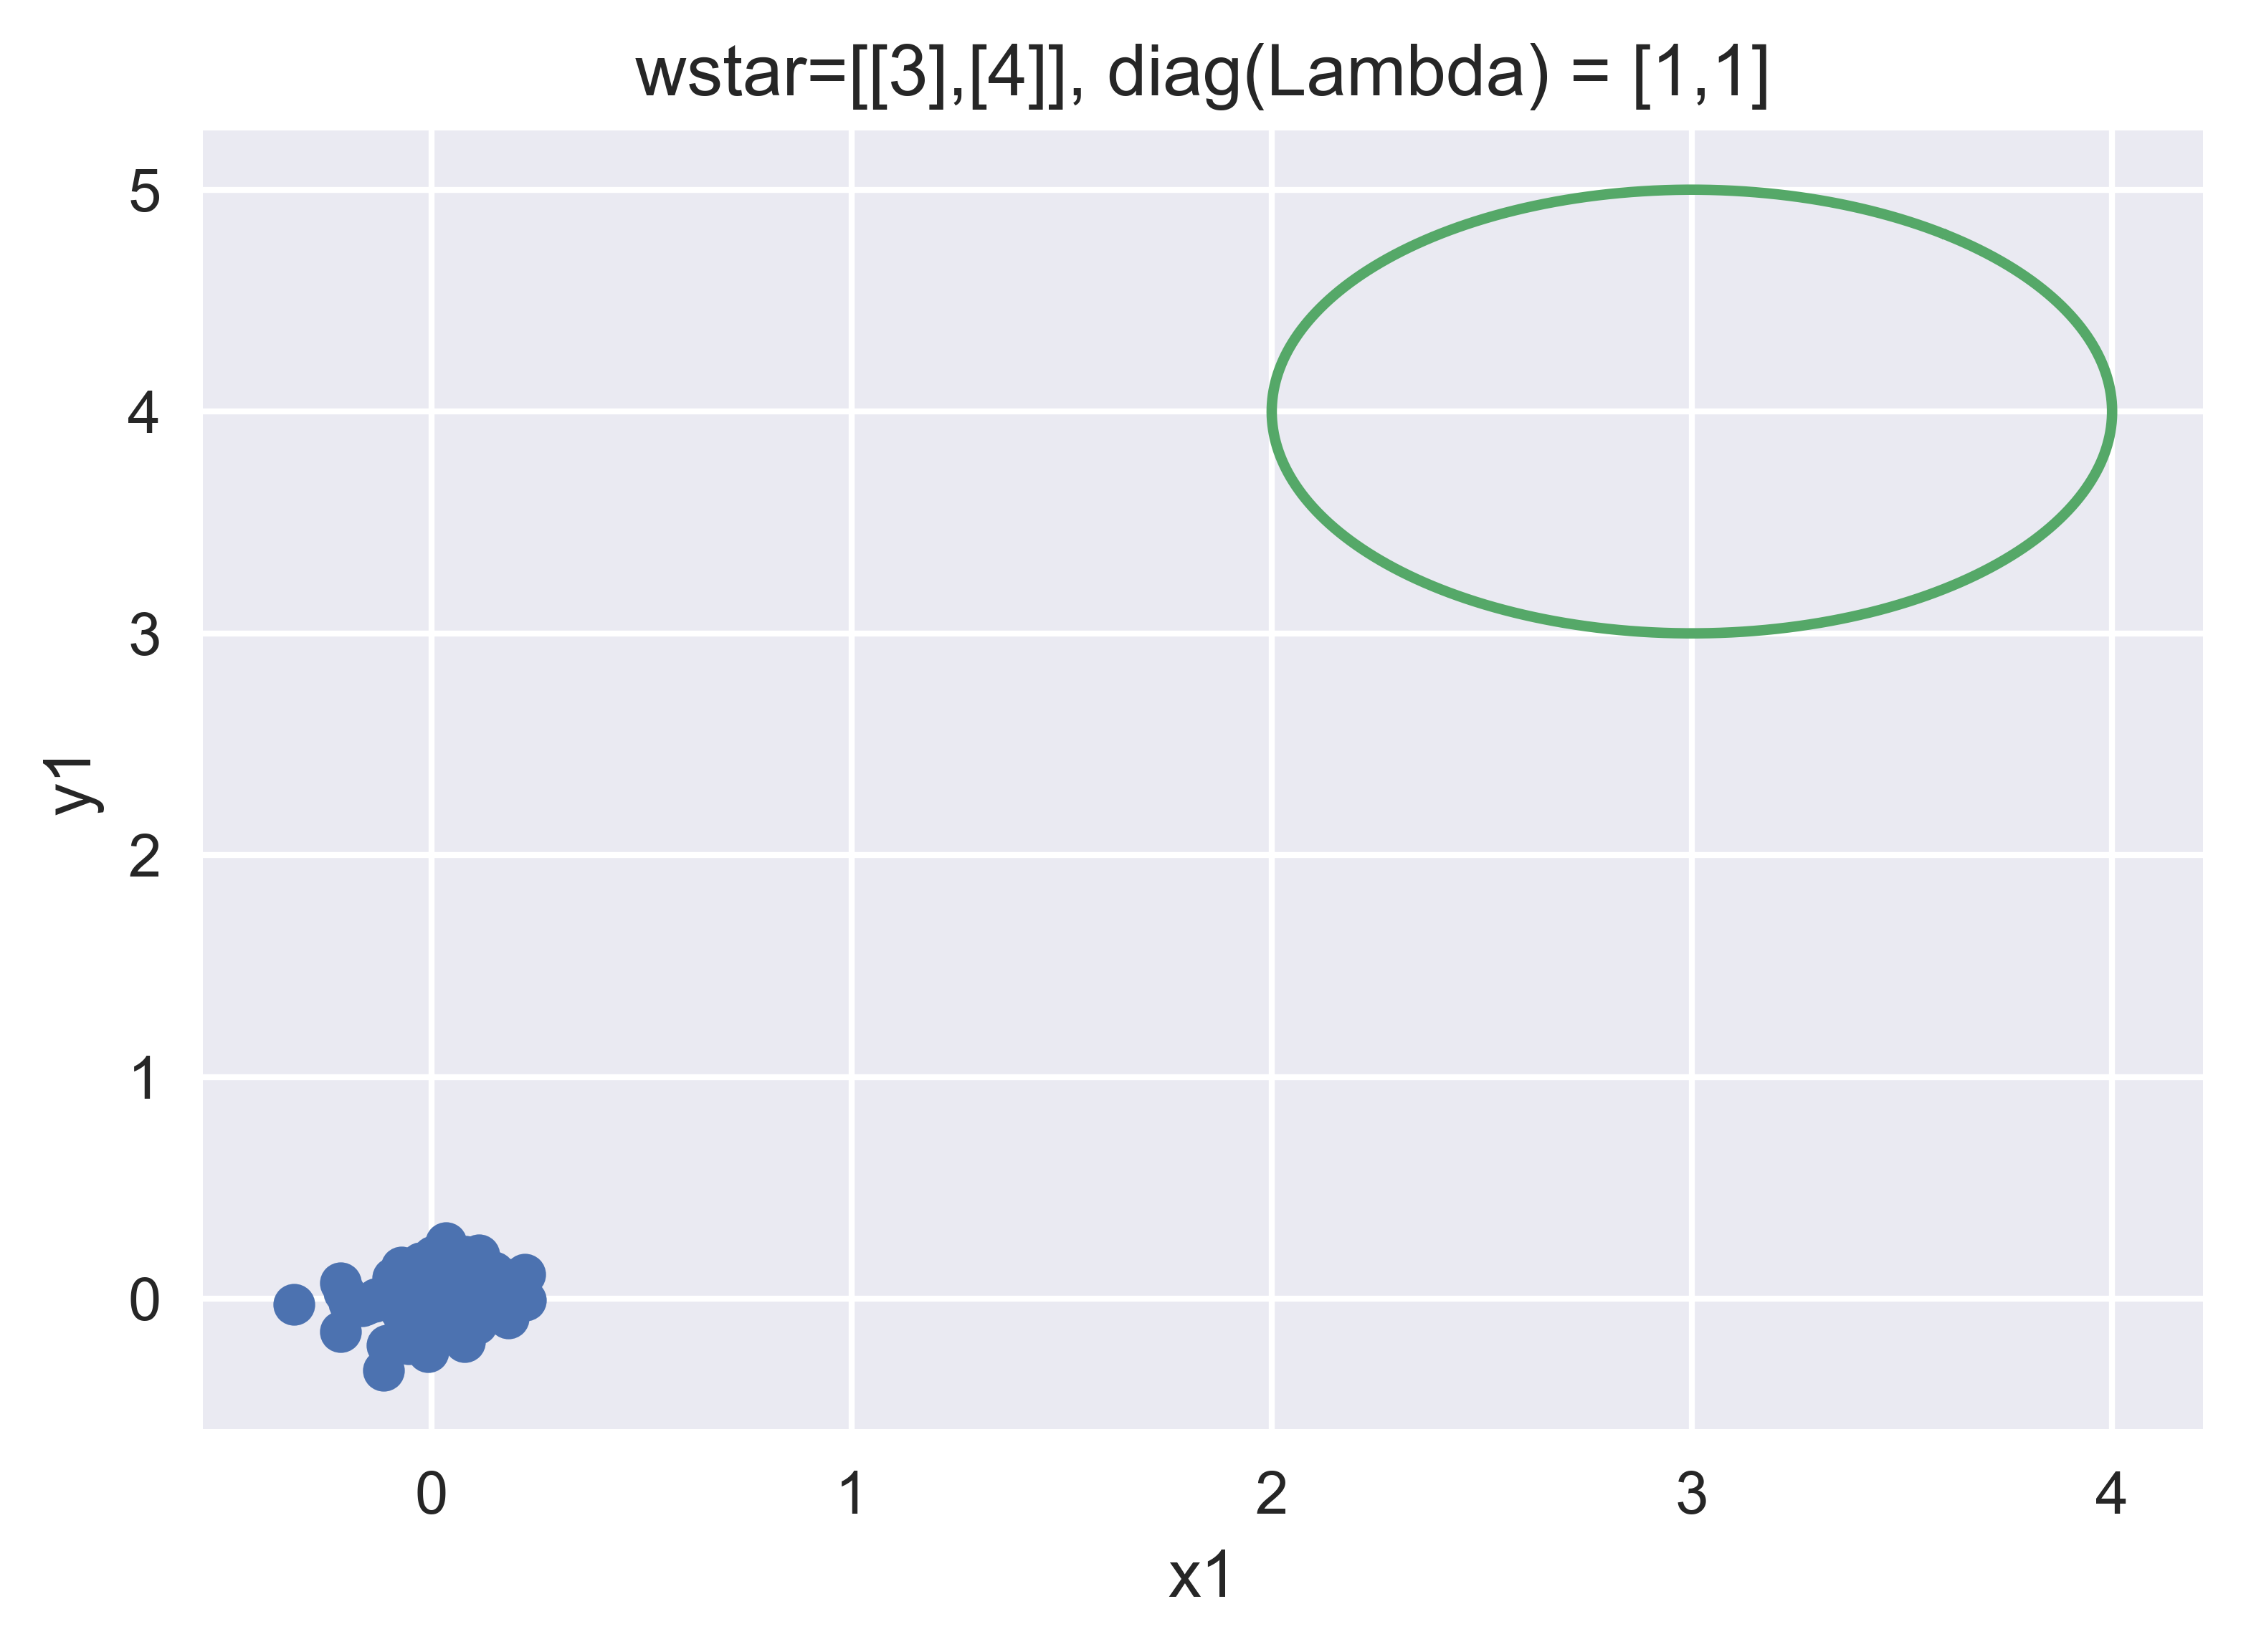

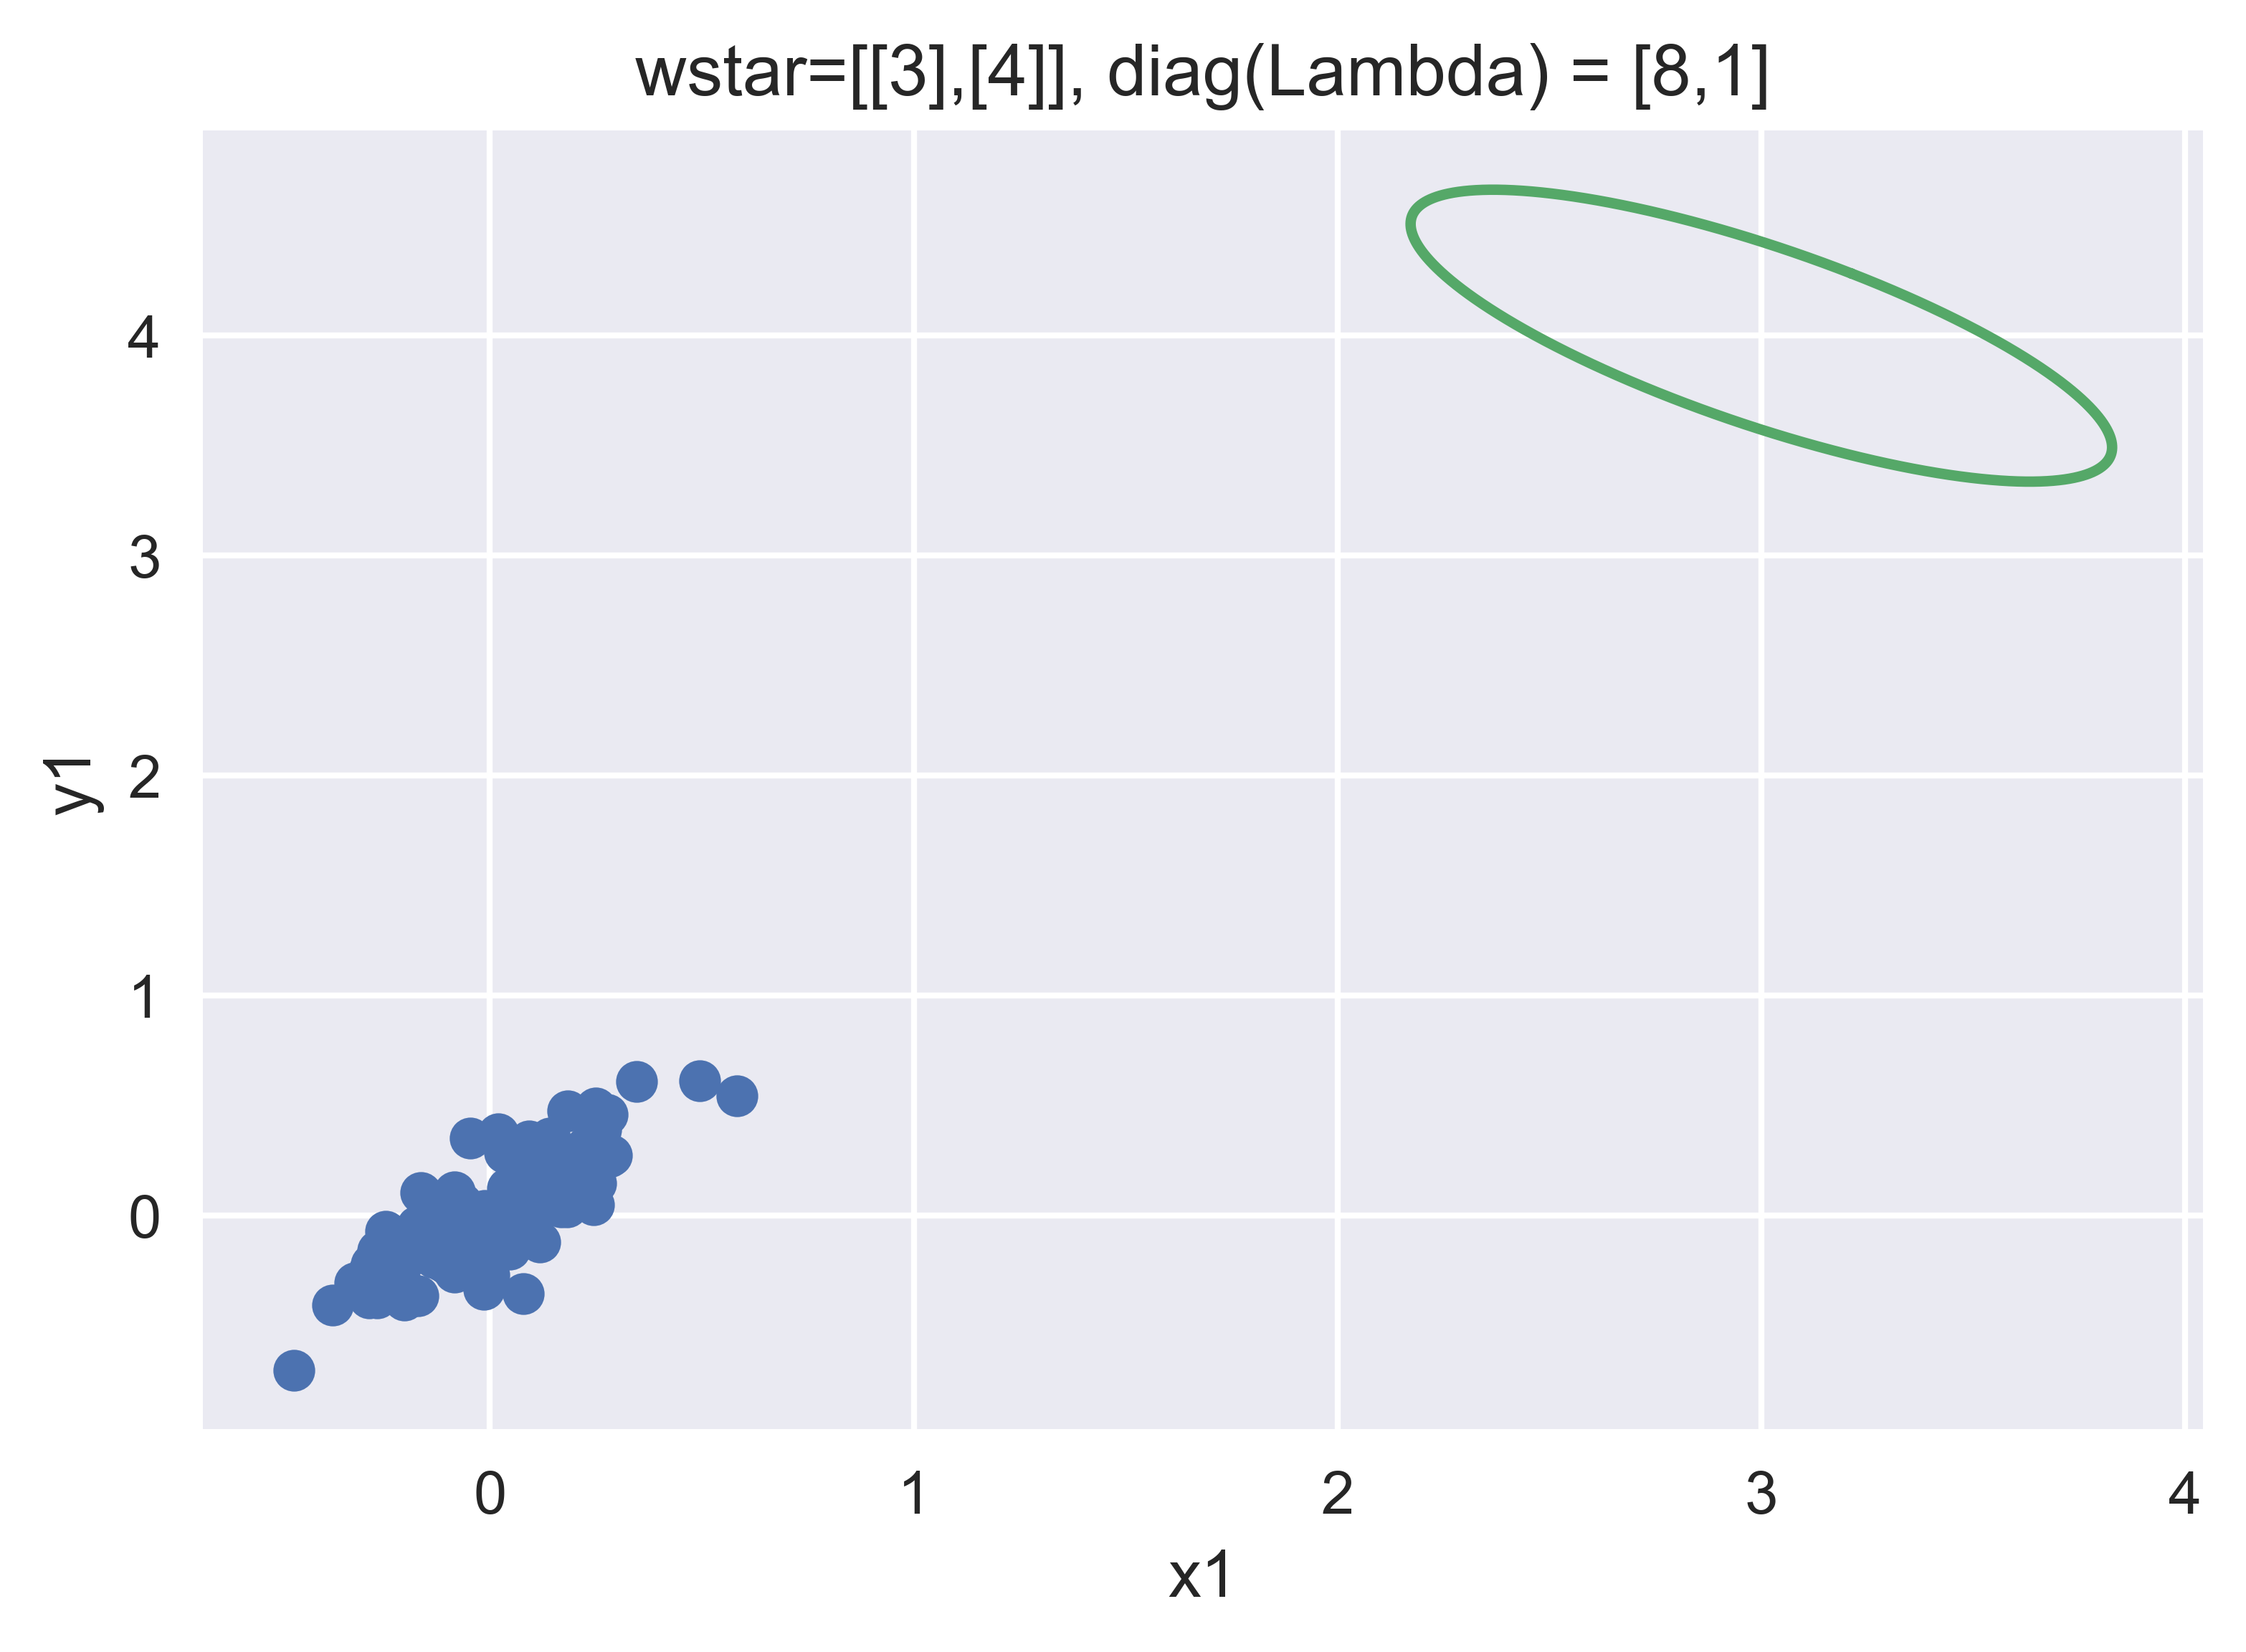

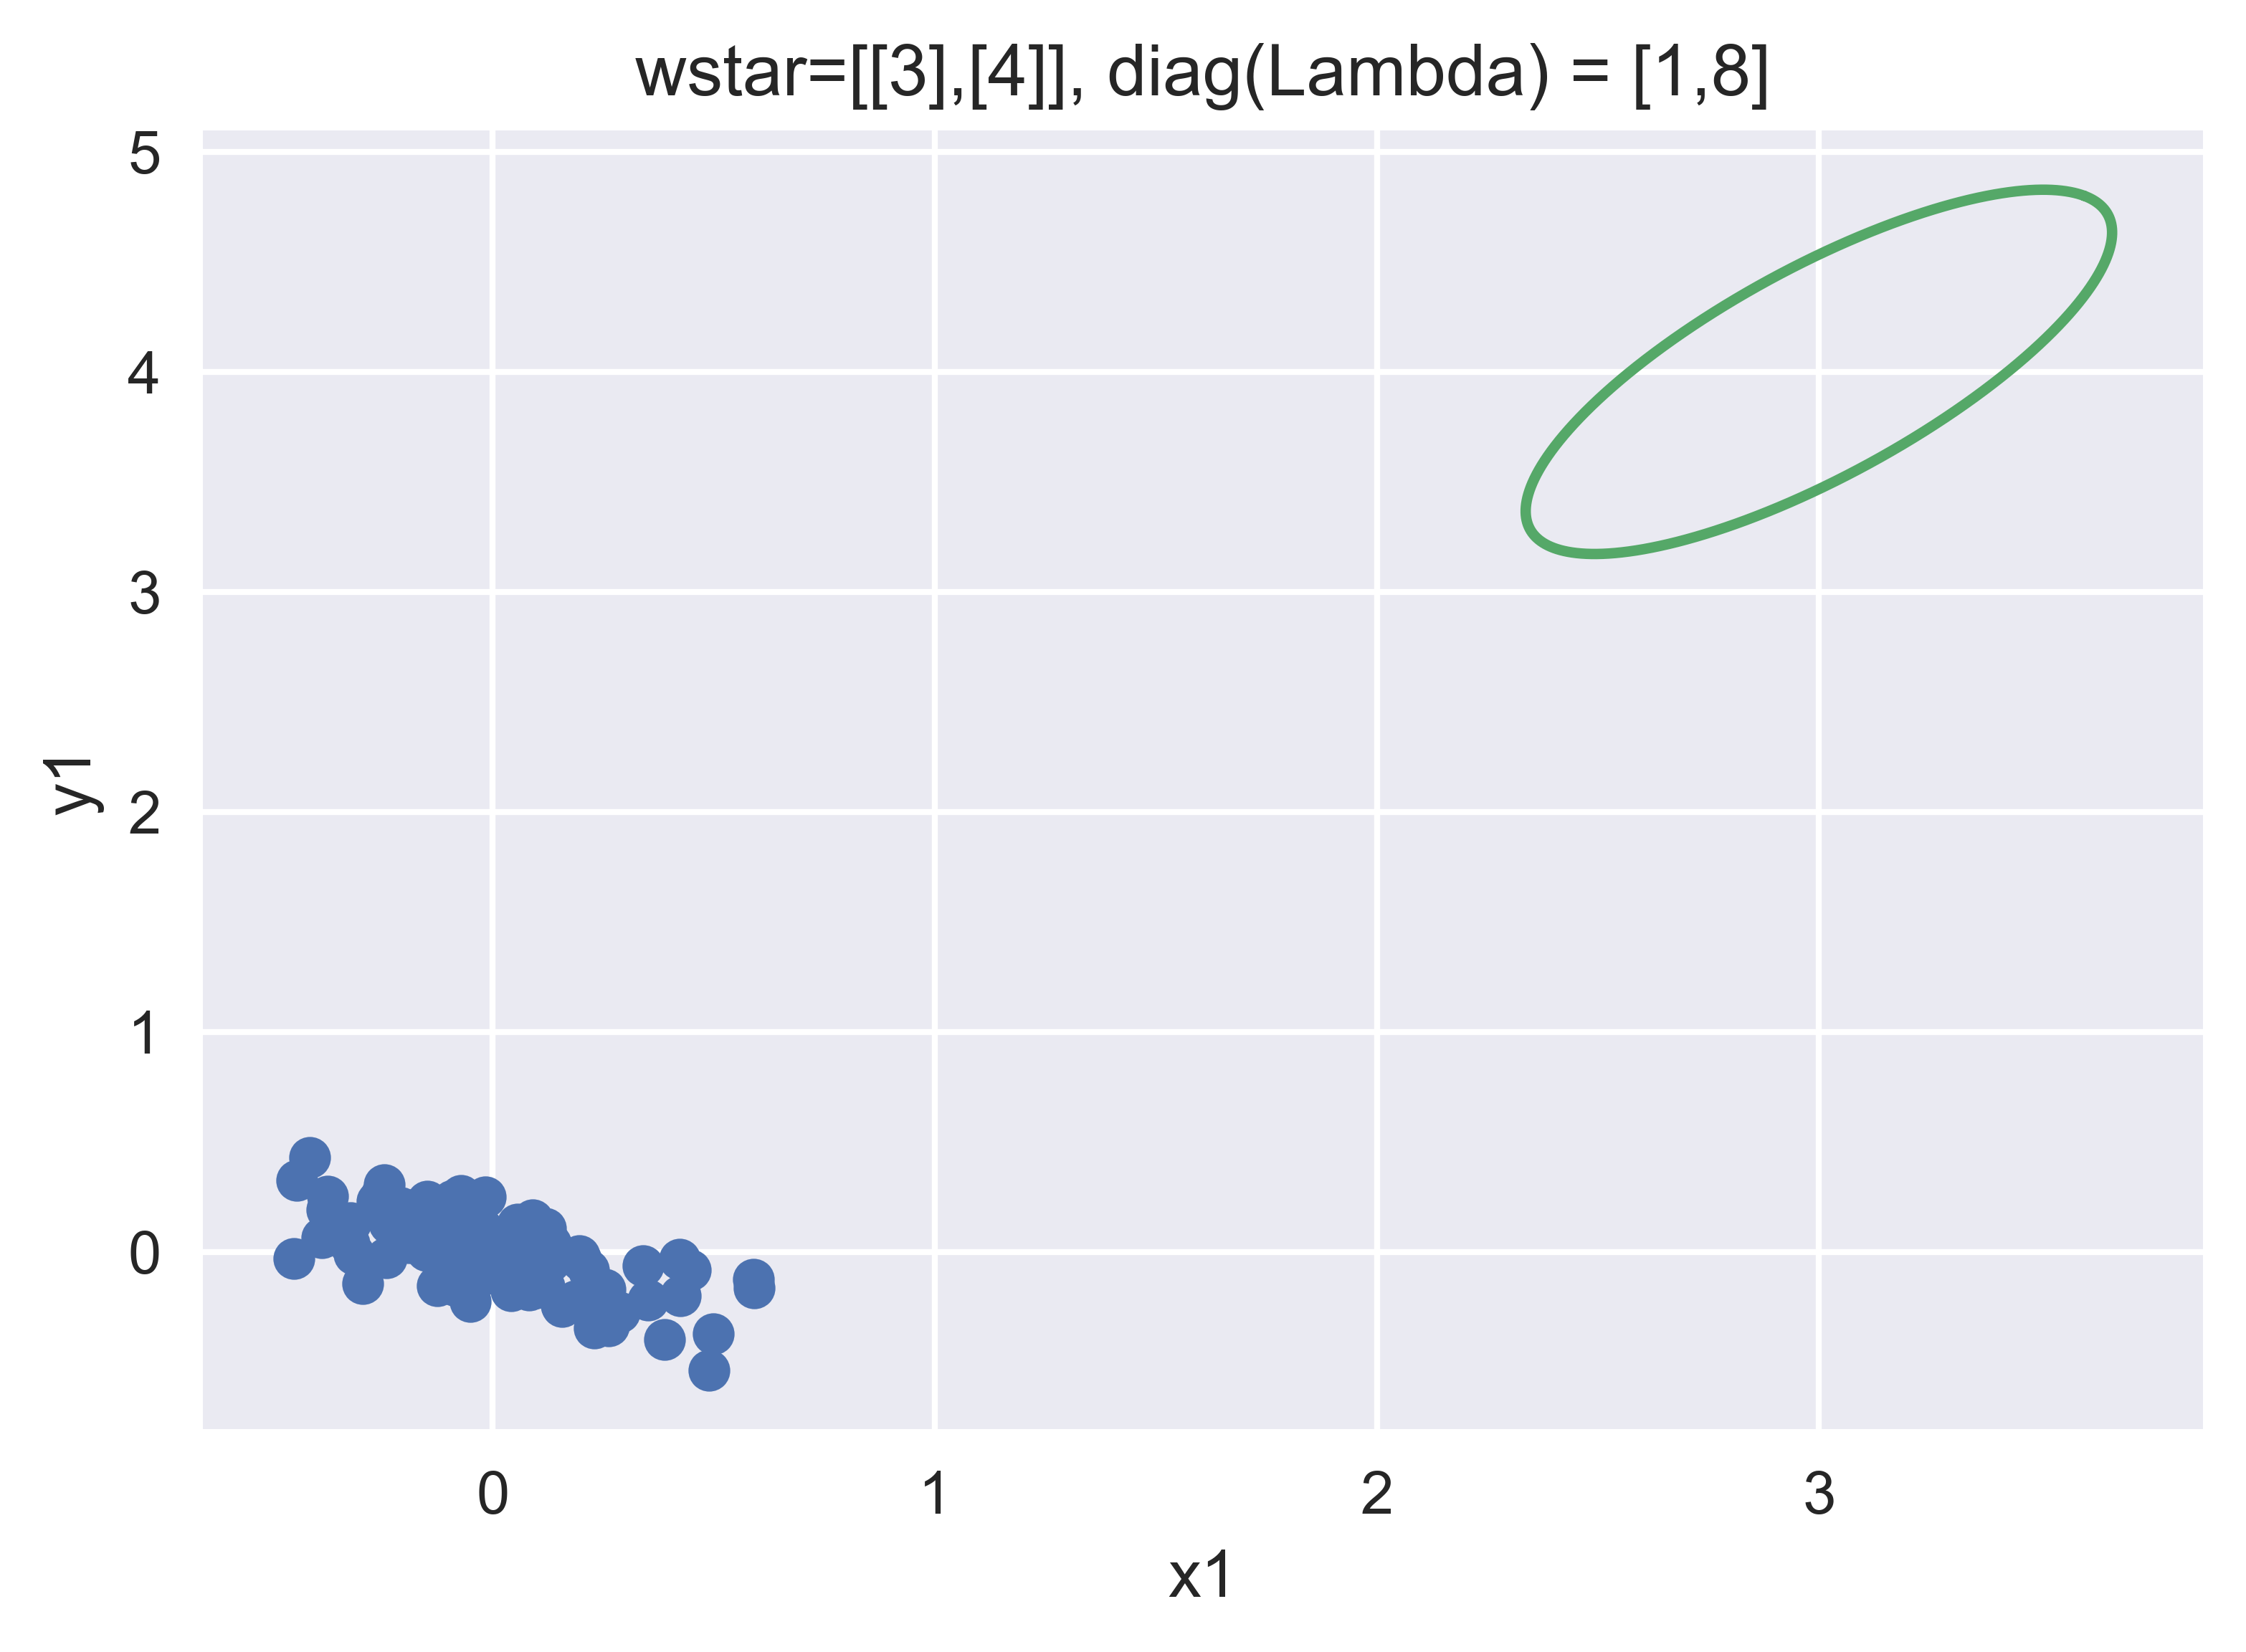

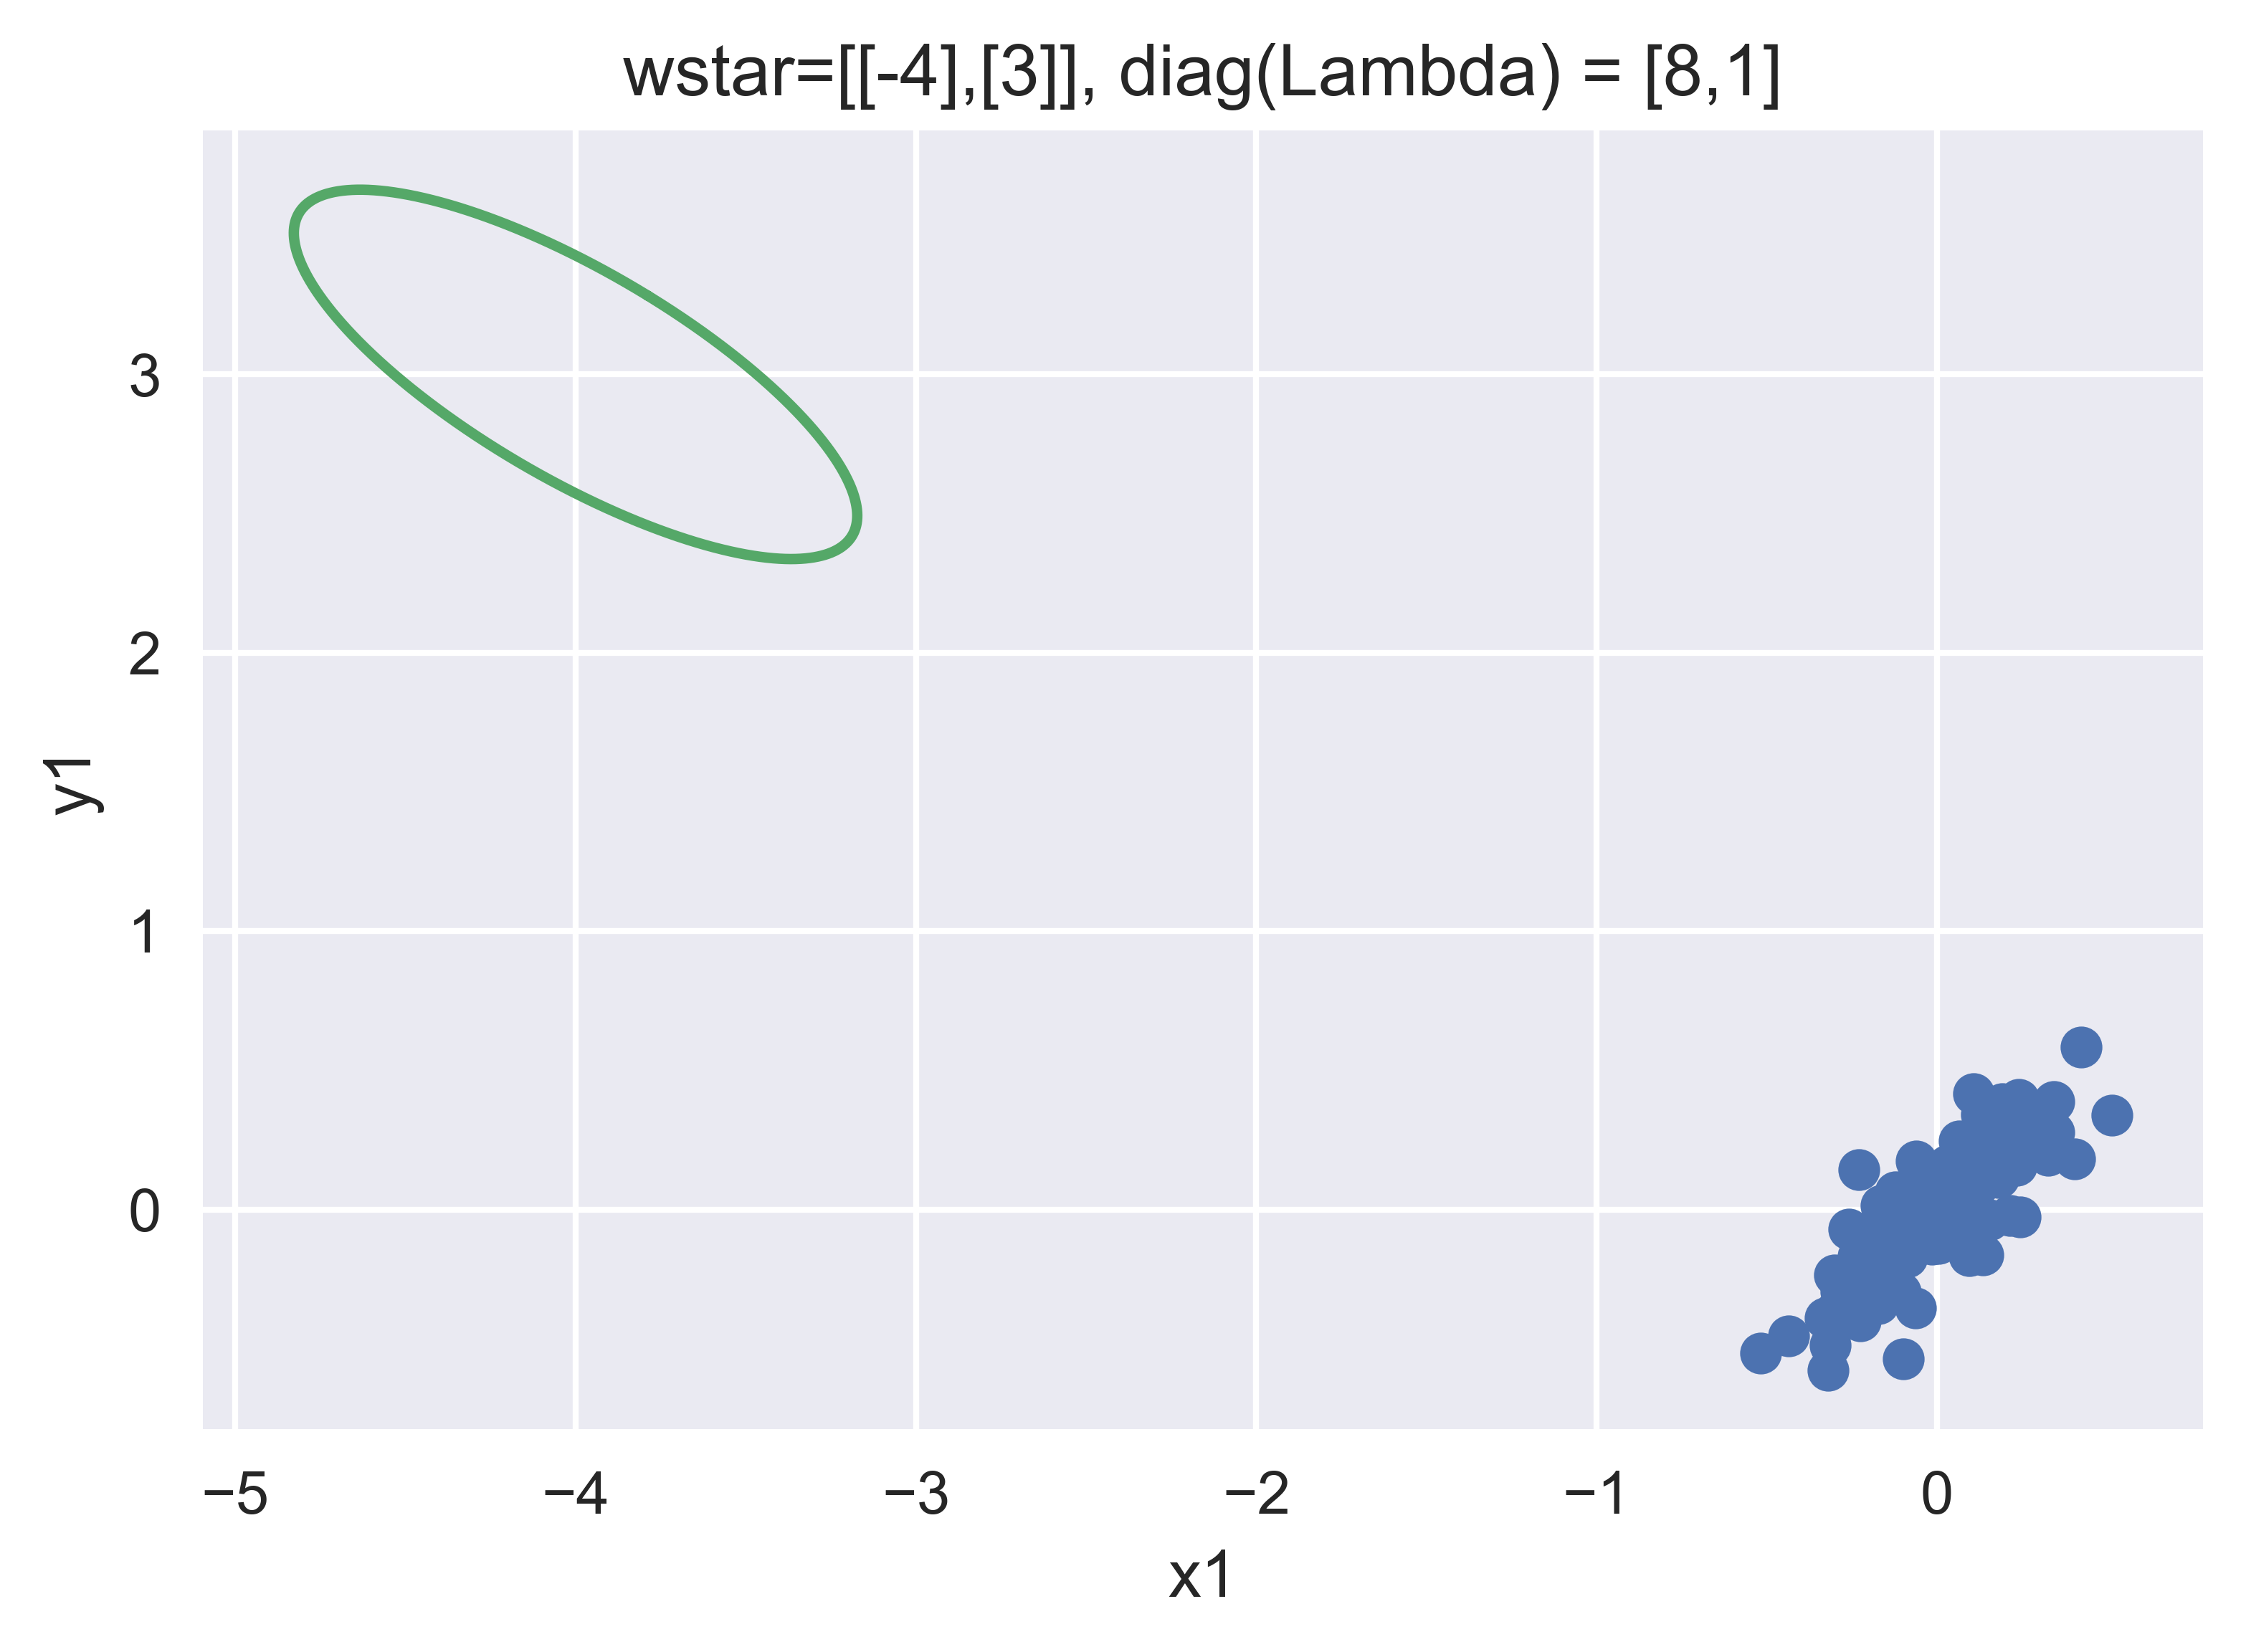

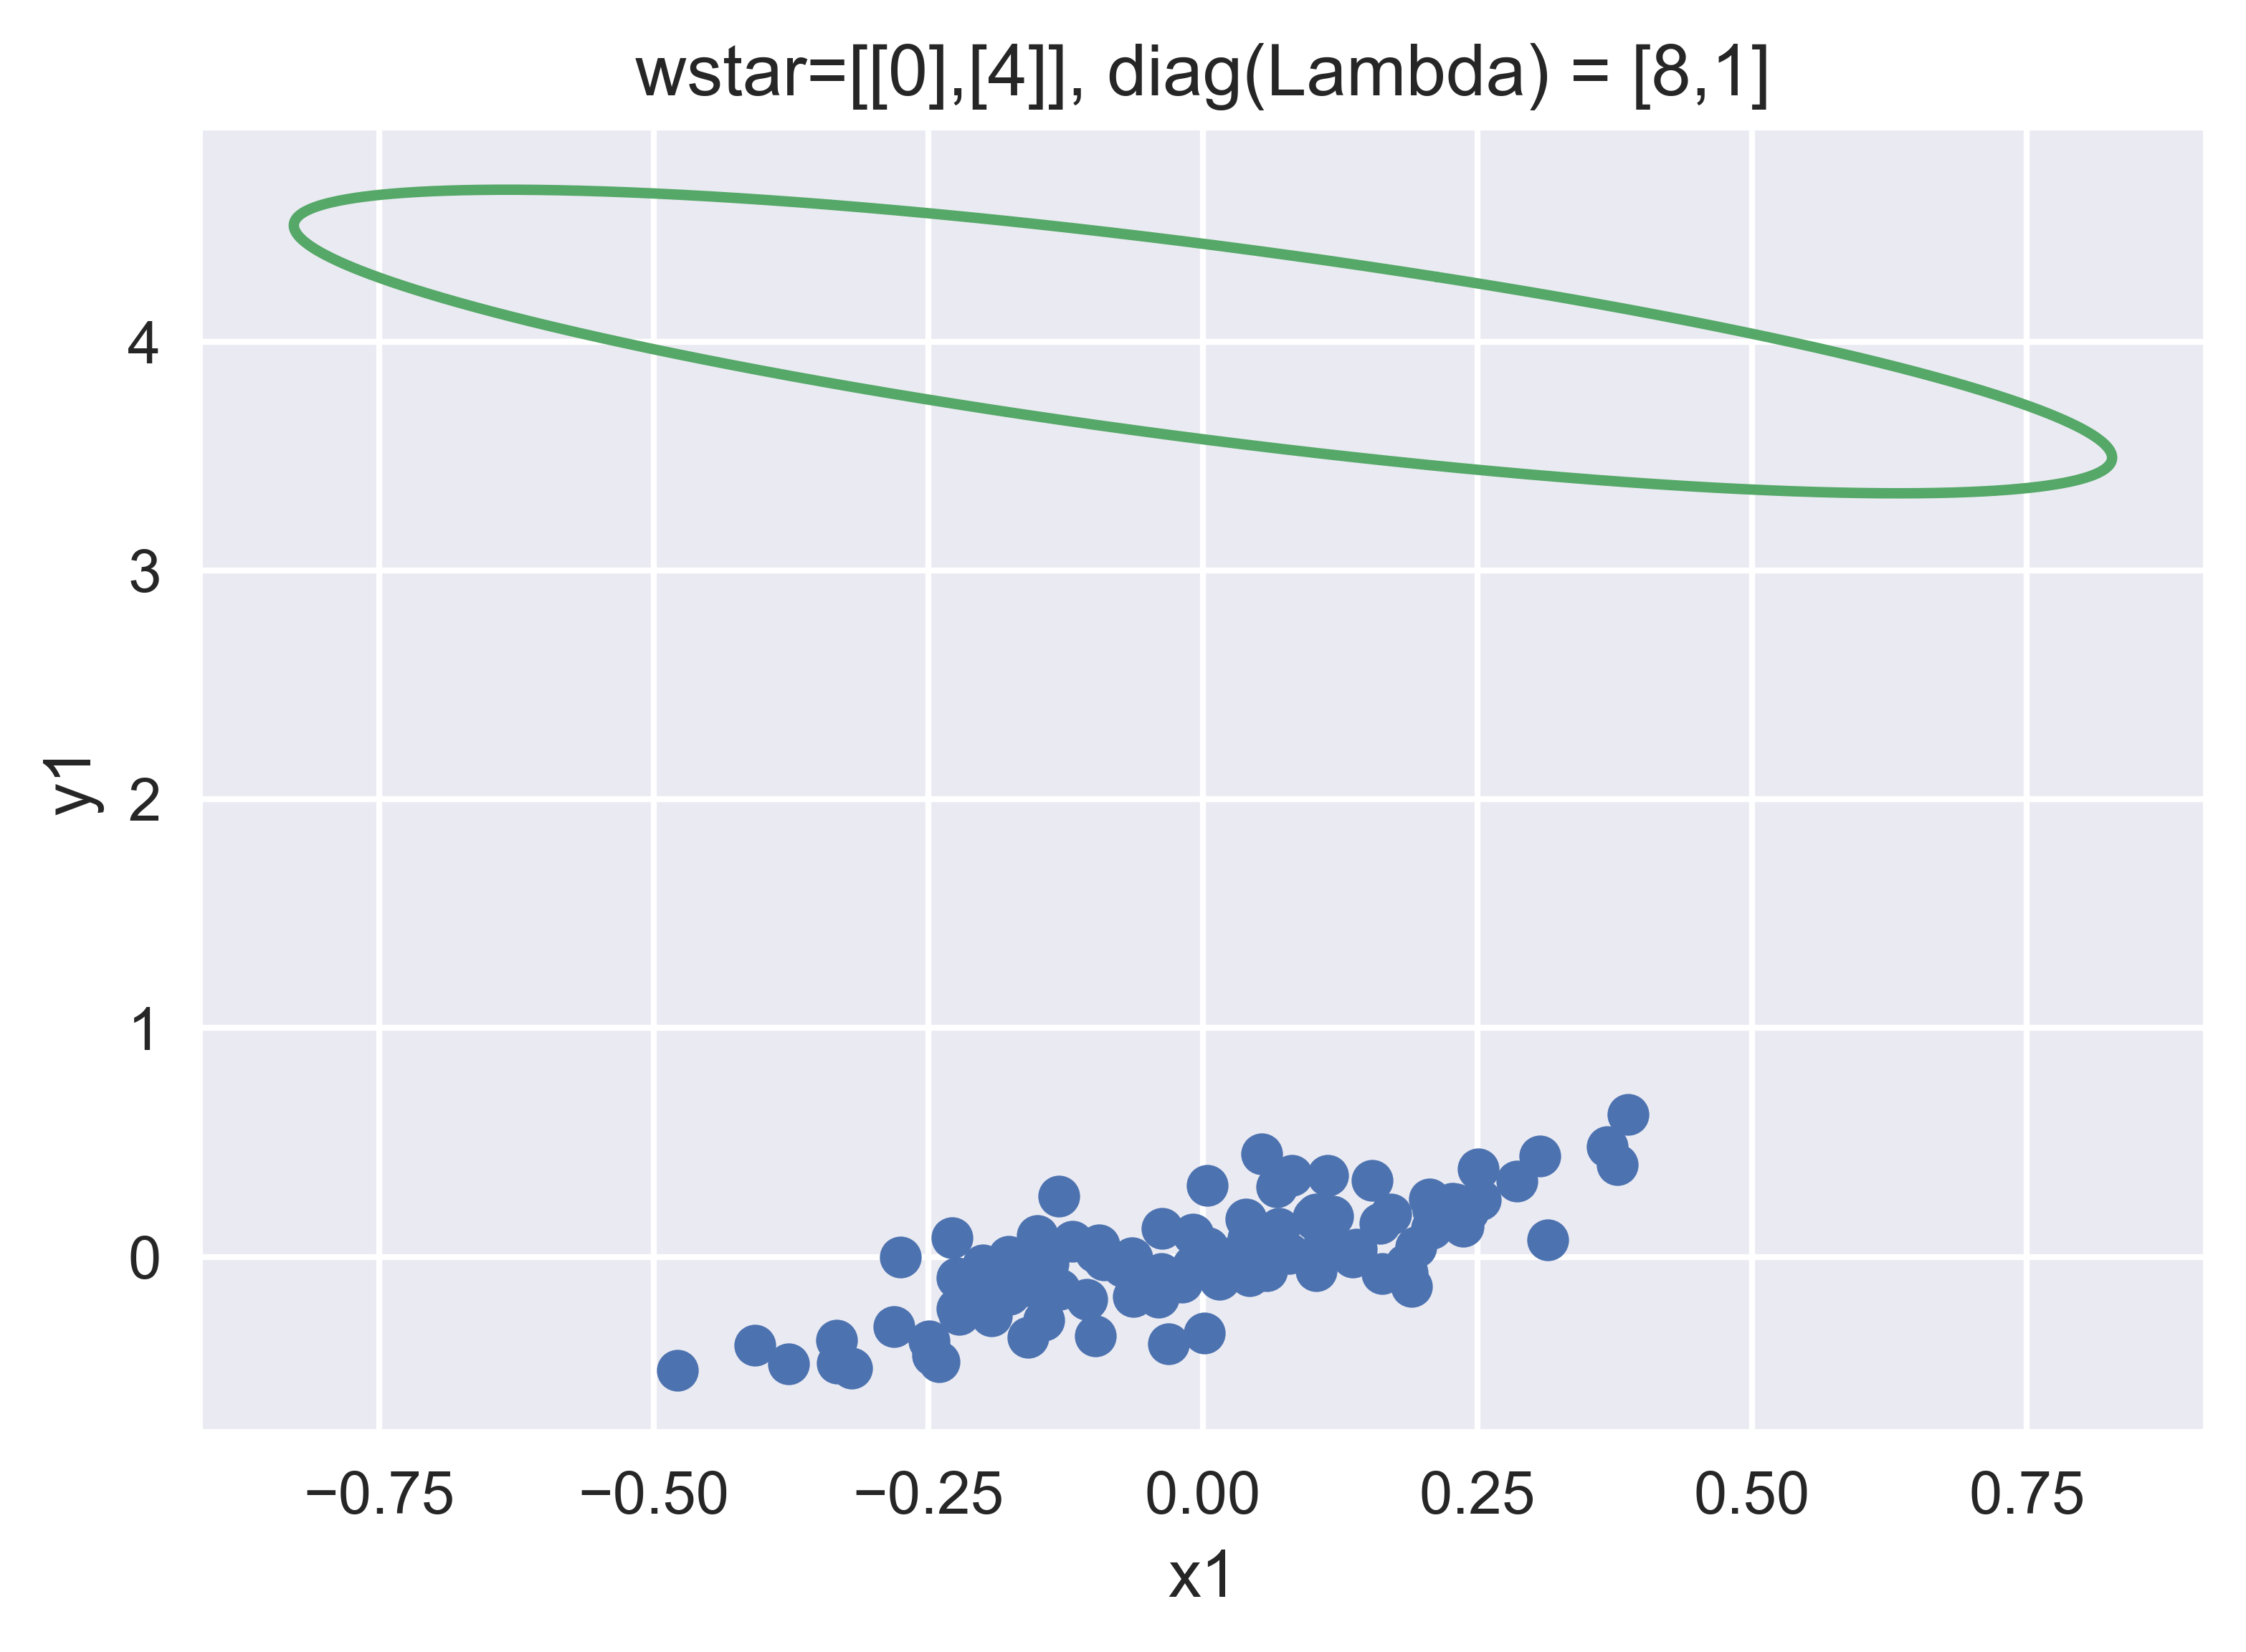

In [4]:
params_int_zipped = zip([np.array([[3,4]]).T,
                  np.array([[3,4]]).T,
                  np.array([[3,4]]).T,
                  np.array([[-4,3]]).T,
                  np.array([[0,4]]).T],
                 [1,8,1,8,8],
                 [1,1,8,1,1])
iteration = 1
for params in params_int_zipped:
    
    w_star = params[0]
    lambda_1 = params[1]
    lambda_2 = params[2]
    
    #x_vec = np.random.randn(2,n)
    # solve for z
    b = np.zeros((1,2))
    n = 100
    x_vec = np.random.randn(n,2)
    
    b[0,0] = -(1/n)*np.sum(x_vec[:,0])
    b[0,1] = -(1/n)*np.sum(x_vec[:,1])
    x_vec = x_vec + b

    w1,v1 = scipy.linalg.eig(np.dot(x_vec.T,x_vec))
    idx = w1.argsort()[::-1]   
    w1 = np.real(w1[idx])
    v1 = v1[:,idx]
    #a_1 = np.dot((np.diag(w1)**-0.5),v1)
    a_1 = np.dot((scipy.linalg.sqrtm(np.linalg.inv(np.diag(w1)))),v1)

    transx_1 = np.dot(x_vec,a_1)


    sigma = np.diag([lambda_1,lambda_2])
    sigma_neghalf = scipy.linalg.sqrtm(np.linalg.inv(sigma))
    sigma_half = scipy.linalg.sqrtm(sigma)

    trans_x = np.dot(transx_1,np.dot(sigma_half,V.T))
    
    b[0,0] = -(1/n)*np.sum(trans_x[:,0])
    b[0,1] = -(1/n)*np.sum(trans_x[:,1])
    z = trans_x + b

    # confidence ellipsoid

    theta = np.arange(0,2*np.pi,0.001)
    cos_sin = np.array([np.cos(theta),np.sin(theta)])
    v_sig = np.dot(V,sigma_neghalf)
    u = np.dot(v_sig,cos_sin)
    u = u + w_star
    
    plt.figure(dpi=600)
    plt.plot(z[:,0],z[:,1],'o',label='z')
    plt.plot(u[0,:],u[1,:],label='confidence ellipsoid')
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.title('wstar=[{},{}], diag(Lambda) = [{},{}]'.format(w_star[0],w_star[1],lambda_1,lambda_2))
    #plt.savefig("hw3_prob1_iter_{}".format(iteration))
    iteration += 1

In [8]:
x_vec.shape

test = np.dot(sigma_neghalf,np.dot(V.T,x_vec.T))

(100, 2)

In [17]:
sigma_neghalf

array([[ 0.35355339,  0.        ],
       [ 0.        ,  1.        ]])

In [9]:
test.shape

(2, 100)

array([[ 0.1178375 , -0.00771851],
       [-0.00771851,  0.89722275]])

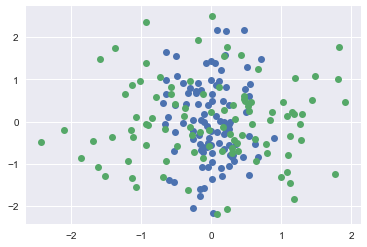

In [24]:
plt.plot(test[0,:],test[1,:],'o')
plt.plot(x_vec[:,0],x_vec[:,1],'o')

np.cov(test)

In [19]:
np.mean(test,axis=1)

array([ -6.66133815e-18,  -6.21724894e-17])

In [16]:
lambda_half

NameError: name 'lambda_half' is not defined

In [15]:
V

array([[ 0.6, -0.8],
       [ 0.8,  0.6]])

In [14]:
np.cov(test)

array([[ 0.1178375 , -0.00771851],
       [-0.00771851,  0.89722275]])

(-1, 4)

(-1, 4)

([<matplotlib.axis.XTick at 0x12308b7b8>,
 <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1232e3358>,
 <a list of 10 Text yticklabel objects>)

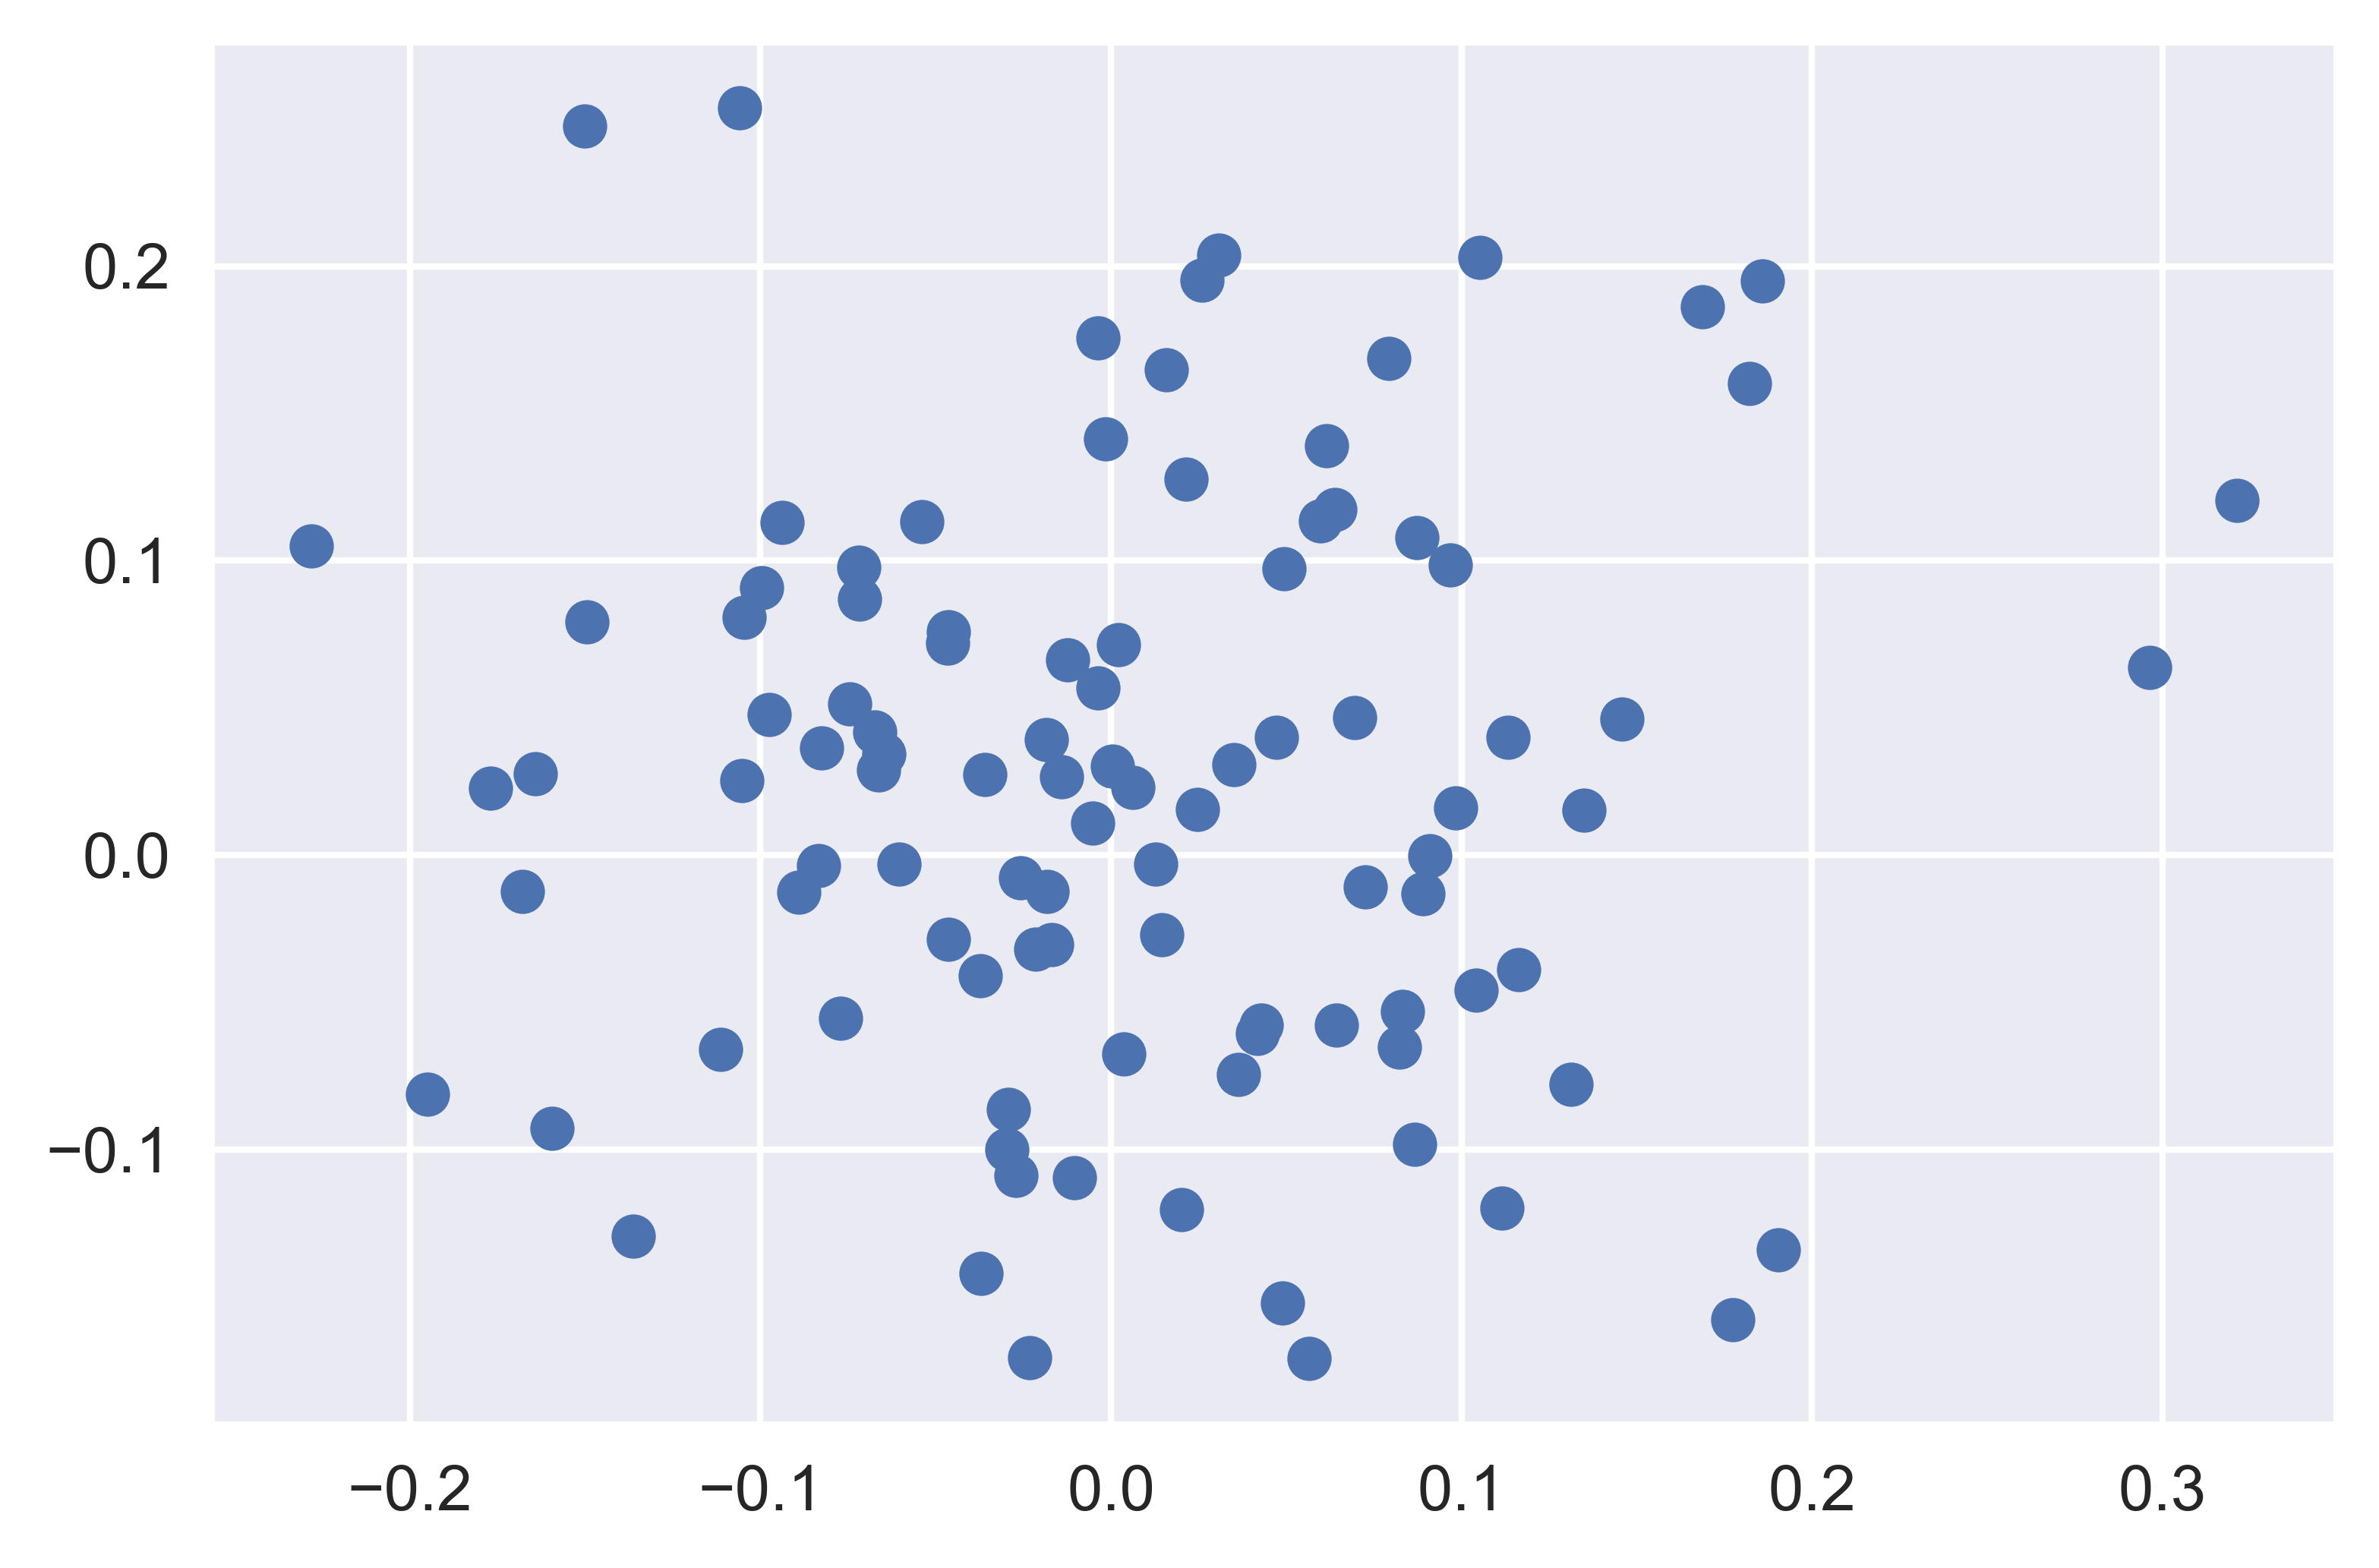

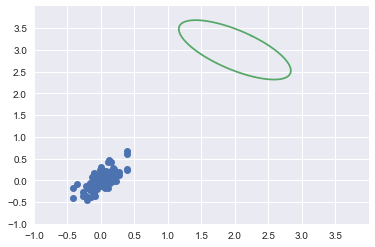

In [228]:
w_star = np.array([[2],[3]])
lambda_1 = 6 
lambda_2 = 1

# solve for z
b = np.zeros((1,2))
n = 100
x_vec = np.random.randn(n,2)

w1,v1 = scipy.linalg.eig(np.dot(x_vec.T,x_vec))
idx = w1.argsort()[::-1]   
w1 = np.real(w1[idx])
v1 = v1[:,idx]
#a_1 = np.dot((np.diag(w1)**-0.5),v1)
a_1 = np.dot((scipy.linalg.sqrtm(np.linalg.inv(np.diag(w1)))),v1)

transx_1 = np.dot(x_vec,a_1)

#plt.plot(transx_1[:,0],transx_1[:,1],'o')

sigma = np.diag([lambda_1,lambda_2])
sigma_neghalf = scipy.linalg.sqrtm(np.linalg.inv(sigma))
sigma_half = scipy.linalg.sqrtm(sigma)

trans_x = np.dot(transx_1,np.dot(sigma_half,V.T))

plt.figure(dpi=600)
plt.plot(transx_1[:,0],transx_1[:,1],'o')


b[0,0] = -(1/n)*np.sum(trans_x[:,0])
b[0,1] = -(1/n)*np.sum(trans_x[:,1])

z = trans_x + b

plt.figure()


plt.plot(z[:,0],z[:,1],'o')

# confidence ellipsoid

theta = np.arange(0,2*np.pi,0.001)
cos_sin = np.array([np.cos(theta),np.sin(theta)])
v_sig = np.dot(V,sigma_neghalf)
u = np.dot(v_sig,cos_sin)
u = u + w_star
plt.plot(u[0,:],u[1,:],label='confidence ellipsoid')
plt.xlim([-1,4])
plt.ylim([-1,4])
plt.xticks(np.arange(-1,4,0.5))
plt.yticks(np.arange(-1,4,0.5))


In [229]:
np.mean(z,axis=0)

array([  5.55111512e-19,  -8.32667268e-19])

In [230]:
n*np.cov(z.T)

array([[ 2.74961464,  2.44646195],
       [ 2.44646195,  4.29063018]])

In [231]:
np.dot(z.T,z)

array([[ 2.7221185 ,  2.42199733],
       [ 2.42199733,  4.24772388]])

In [232]:
np.dot(V,np.dot(sigma,V.T))

array([[ 2.8,  2.4],
       [ 2.4,  4.2]])

In [224]:
sigma

array([[6, 0],
       [0, 1]])

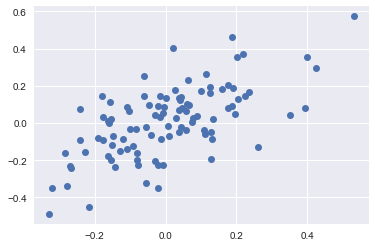

In [198]:
scale = np.dot(transx_1,np.dot(sigma_half,V.T))
plt.plot(scale[:,0],scale[:,1],'o')

In [22]:
np.dot(V,V.T)

array([[ 1.,  0.],
       [ 0.,  1.]])